In [1]:
'''
IMPORTS 
'''

import pandas as pd
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import os
import pywt
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import to_categorical
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC

Using TensorFlow backend.


In [5]:
# Function to rename multiple files 
def rename(direc): 
    for count, filename in enumerate(os.listdir(direc)): 
        print(filename)
        
        sstring1 = 'input'
        res = filename.replace(sstring1, '27A')   
        print(res)
        
        dst =res
        src =direc+"/"+ filename 
        dst =direc+"/"+ dst 
        print(src)
        print(dst)
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        
      
        

direc = '/home/surya/Desktop/nlos_test_cases/intel_captures_2bhk_nagaraj/27Aug/csv'
rename(direc)

input_walk_br2_a1_2.csv
27A_walk_br2_a1_2.csv
/home/surya/Desktop/nlos_test_cases/intel_captures_2bhk_nagaraj/27Aug/csv/input_walk_br2_a1_2.csv
/home/surya/Desktop/nlos_test_cases/intel_captures_2bhk_nagaraj/27Aug/csv/27A_walk_br2_a1_2.csv
input_walk_br2_b1_4.csv
27A_walk_br2_b1_4.csv
/home/surya/Desktop/nlos_test_cases/intel_captures_2bhk_nagaraj/27Aug/csv/input_walk_br2_b1_4.csv
/home/surya/Desktop/nlos_test_cases/intel_captures_2bhk_nagaraj/27Aug/csv/27A_walk_br2_b1_4.csv
input_walk_br2_b2_2.csv
27A_walk_br2_b2_2.csv
/home/surya/Desktop/nlos_test_cases/intel_captures_2bhk_nagaraj/27Aug/csv/input_walk_br2_b2_2.csv
/home/surya/Desktop/nlos_test_cases/intel_captures_2bhk_nagaraj/27Aug/csv/27A_walk_br2_b2_2.csv
input_walk_br2_b1_1.csv
27A_walk_br2_b1_1.csv
/home/surya/Desktop/nlos_test_cases/intel_captures_2bhk_nagaraj/27Aug/csv/input_walk_br2_b1_1.csv
/home/surya/Desktop/nlos_test_cases/intel_captures_2bhk_nagaraj/27Aug/csv/27A_walk_br2_b1_1.csv
input_start_stop_walk_br2_b1_1.csv
27A_s

In [120]:

## Once for a dataset
##################################################################

'''
This replaces every i to j and converts to a complex no.
'''
def replace_ij(df):
    for tits in df.columns:
        if(tits != 'File'):
        
            if df[tits].dtypes =='O':
                df[tits] = df[tits].str.replace('i','j')
                df[tits] = df[tits].str.replace(' ','')
                df[tits] = df[tits].apply(lambda x: np.complex(x))
                
    return df

'''
This finds the magnitude of every complex no.
'''
def find_mag(df): #### creating magnitude 
    for tits in df.columns:
        if(tits != 'File'):
            
            df[tits] = np.round(np.abs(df[tits]),decimals = 2)
            
            if df[tits].dtypes =='O':
                print("hi")
                
    return df
'''
This imports the magnitudes into a csv file and creates in the final dir. 
'''
def convert_to_mag(initial_path,final_path):
    '''
    This iterates over every csv in the inital_path and then outputs the mag_csv to final_path.
    '''
    
    directory = initial_path
    z = directory + "/"
    
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            a = z + filename
            print('Under Progress',filename)
            df = pd.read_csv(a)
            print(len(df.columns))
            if (len(df.columns) == 90):
                df.columns = ['a_1','b_1','c_1','a_2','b_2','c_2','a_3','b_3','c_3','a_4','b_4','c_4','a_5','b_5','c_5','a_6','b_6','c_6','a_7','b_7','c_7','a_8','b_8','c_8','a_9','b_9','c_9','a_10','b_10','c_10','a_11','b_11','c_11','a_12','b_12','c_12','a_13','b_13','c_13','a_14','b_14','c_14','a_15','b_15','c_15','a_16','b_16','c_16','a_17','b_17','c_17','a_18','b_18','c_18','a_19','b_19','c_19','a_20','b_20','c_20','a_21','b_21','c_21','a_22','b_22','c_22','a_23','b_23','c_23','a_24','b_24','c_24','a_25','b_25','c_25','a_26','b_26','c_26','a_27','b_27','c_27','a_28','b_28','c_28','a_29','b_29','c_29','a_30','b_30','c_30']
            
            
            
            df = replace_ij(df)
            df = find_mag(df)
        
            target_name = final_path + filename

            print('done')
            
            
            df.to_csv(target_name,index=False)
            
    print("All CSV's DONE !!")
    
init1 = '/home/surya/Desktop/wifi_sensing/final/2_BHK_20Aug_rawdata/act'
init2 = '/home/surya/Desktop/wifi_sensing/final/2_BHK_20Aug_rawdata/noact'

final1 = '/home/surya/Desktop/wifi_sensing/final/2_BHK_20Aug_mag_data/act/'
final2 = '/home/surya/Desktop/wifi_sensing/final/2_BHK_20Aug_mag_data/noact/'

convert_to_mag(init2,final2)
convert_to_mag(init1,final1)



Under Progress 19A_noactivity_7.csv
90
done
Under Progress 19A_noactivity_3.csv
90
done
Under Progress 20A_noactivity_2.csv
90
done
Under Progress 19A_noactivity_1.csv
90
done
Under Progress 19A_noactivity_4.csv
90
done
Under Progress 19A_noactivity_5.csv
90
done
Under Progress 19A_noactivity_6.csv
90
done
Under Progress 20A_noactivity_1.csv
90
done
Under Progress 19A_noactivity_2.csv
90
done
All CSV's DONE !!
Under Progress 20A_walk_br2_a2_2.csv
90
done
Under Progress 20A_walk_br2_a1_1.csv
90
done
Under Progress 20A_walk_hall_d2_1.csv
90
done
Under Progress 20A_walk_hall_d1_2.csv
90
done
Under Progress 20A_walk_br2_b2_1.csv
90
done
Under Progress 20A_walk_br2_a2_1.csv
90
done
Under Progress 20A_walk_br2_b2_2.csv
90
done
Under Progress 20A_walk_hall_d1_1.csv
90
done
Under Progress 20A_walk_br2_a1_2.csv
90
done
All CSV's DONE !!


In [11]:
'''
This downsamples the csv file content with dsr: DOWN SAMPLING RATIO.
'''
def create_downsample(dsr,samples,csv,col_name):
    
    df = pd.read_csv(csv,usecols=col_name)
    length =  df.shape[1] ## 30 subcarriers
    total = []
    
    temp = np.zeros((30000,length))
    temp = np.array(df[:samples])
    
    trans = np.transpose(temp)
    
    down_sampled = np.zeros((length,int(samples/dsr)),dtype = float)
      
    for row in range(0,dsr):
        down_sampled = trans[:,row::dsr]
        total.append(down_sampled)
    #print("The shape of desampled list :",np.shape(total))
    return total
   
##########################################################
'''
 below code is for returning the list of col_names [b_1.....b_30]
'''

names =[]
for i in range(1,31):
    temp = str("b_" + str(i))
    names.append(temp)
#print(names)



'''
This converts the (16,30,1875) to (172,30,300), default = 16
WITH AN OVERLAPPING WINDOW OF 50%
'''
def part_time_slice(arr,size = 300,overlap_per = 50):

    start = int(0)
    stop = int(start+size)
    temp = arr
    list1 = []
    while(stop <= arr.shape[1]):## arr.shape[1] == 1875. 
        datapoint = np.zeros((30,size))
        datapoint = np.array(temp[:,start:stop],dtype=float)
        #print("This is datapoint")
        #print(np.shape(datapoint))
        list1.append(datapoint)
        start =int( start+((100-overlap_per)*0.01*size))
        stop = int(start  +size)
    return list1 
'''
Joins every small part to the whole
'''

def total_time_parse(sliced_list,dsr = 16):
    time_parse_list = []
    for itr in range(dsr):
        temp = (sliced_list[itr])
        #print("The shape of temp is ", np.shape(temp))
        list_son = part_time_slice(temp)
        
        #print("The dimension of list_son is :", np.shape(list_son))
        
        time_parse_list.extend(list_son)
        
    return time_parse_list

'''
Performs wavelet denoising !!!
'''
def denoise(signal, thresh ,title = None, wavelet="db5"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return  np.round(reconstructed_signal,decimals = 2)

def preprocess(datapoint,thresh = 0.35):
    dummy = np.zeros(datapoint.shape)
    for car in range(30):
        dummy[car,:] = denoise(datapoint[car,:],thresh) 
    return dummy
'''
This is to find out the features for every chunk i.e 300*30 matrix.
'''

cols = ['b_1','b_2','b_3','b_4','b_5','b_6','b_7','b_8','b_9','b_10','b_11','b_12','b_13','b_14','b_15','b_16','b_17','b_18','b_19','b_20','b_21','b_22','b_23','b_24','b_25','b_26','b_27','b_28','b_29','b_30']
def heat_map(array):
    plt.figure(figsize=(20,20))
    sns.set(font_scale=1.5)
    hm = sns.heatmap(array,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 12},yticklabels=cols,xticklabels=cols)
    plt.tight_layout()
    plt.show()

def normalixing_matrix(arr): ## array should be 300*30
    normed =(arr - arr.mean(axis=0)) / arr.std(axis=0)
    #print("The shape of normed is", normed.shape)
    cov = np.cov(normed.T)
    return normed,cov

def eigendecomposition(array,k):
    eig_values, eig_vectors = np.linalg.eig(array)
    idx = np.argsort(eig_values, axis=0)[::-1]
    sorted_eig_vectors = eig_vectors[:, idx]
    cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
    xint = range(1, len(cumsum) + 1)
    '''
    plt.figure(figsize = (10,10))
    plt.plot(xint, cumsum)
    plt.xlabel("Number of components")
    plt.ylabel("Cumulative explained variance")
    plt.xticks(xint)
    plt.xlim(1, 30, 1)
    '''
    req_eig_vectors = sorted_eig_vectors[:, 0:k]
    return req_eig_vectors

def diff(array):
    sum = 0
    for i in range(1,len(array)):
        sum = sum + abs(array[i] - array[i-1])
    sum = sum / len(array)-1
    return sum

def extractfeatures(array):
    lis = np.zeros(array.shape[1])
    for i in range(array.shape[1]):
        temp = array[:,i]
        lis[i] = diff(temp)
    return lis
        

'''
This is the summary of all codes above !!
'''




def feature_produce(chunk):# chunk shoould be 30*300
    trans = chunk.T
    normed,cov = normalixing_matrix(trans)
    req_eig_vectors = eigendecomposition(cov,5)
    features= extractfeatures(req_eig_vectors)
    return features

In [12]:
def create_dad(csv,target,title,dsr= 16 ,samples = 30000):
    dad = pd.DataFrame()
    sliced_list = create_downsample(dsr,samples,csv,names)
    time_parse_list = total_time_parse(sliced_list) ## This time parse list is for each 
    print("The shape after time parsing : ",np.shape(time_parse_list))
    
    son = np.array(time_parse_list)
    filename = title
    content_csv = []
    for itr in range(son.shape[0]):
        row = []
        title = filename + "(" + str(itr) + ")"
        feat = np.round(feature_produce(son[itr]),decimals = 3)
        row.append(title)
        row.extend(feat)
        row.append(target)
        content_csv.append(row)
    dad =dad.append(content_csv)
    #print(dad.head)
        
        
    return dad


def create_godfather(dataframe,target):
    if(target == 0):
        GF = dataframe
        directory = '/home/surya/Desktop/wifi_sensing/final/2_BHK_20Aug_mag_data/noact'
        z = directory + "/"
    else:
        GF = dataframe
        directory = '/home/surya/Desktop/wifi_sensing/final/2_BHK_20Aug_mag_data/act'
        z = directory + "/"
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            a = z + filename
# <><><><><><><><><><><><><><><><><><><><><><><><><><>

#This is for deciding the title


        if(target == 0):
            sstring1 = '/home/surya/Desktop/wifi_sensing/final/2_BHK_20Aug_mag_data/noact'
            res = a.replace(sstring1, 'no_act') 
        else:
            sstring1 = '/home/surya/Desktop/wifi_sensing/final/2_BHK_20Aug_mag_data/act'
            res = a.replace(sstring1, '') 
                
        sstring2 = '.csv'
        title = res.replace(sstring2, '') 
            
        print('Under Progress',title)
        content_one_csv = create_dad(a,target,title)
        GF = GF.append(content_one_csv)
        
#<><><><><><><><><><><><><><><><><><><><><><><><><><>
    return GF


In [121]:
### Creation of feature ser

GF = pd.DataFrame()
GF = create_godfather(GF,0)
GF = create_godfather(GF,1)
print(GF.head())
print(len(GF.columns))
if (len(GF.columns) == 7):
    GF.columns = ['title','A_1','A_2','A_3','A_4','A_5','Y']
GF.to_csv("SVM_features_2BHK_20Aug.csv",index=False)

Under Progress no_act/19A_noactivity_7
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_3
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/20A_noactivity_2
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_1
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_4
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_5
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_6
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/20A_noactivity_1
The shape after time parsing :  (176, 30, 300)
Under Progress no_act/19A_noactivity_2
The shape after time parsing :  (176, 30, 300)
Under Progress /20A_walk_br2_a2_2
The shape after time parsing :  (176, 30, 300)
Under Progress /20A_walk_br2_a1_1
The shape after time parsing :  (176, 30, 300)
Under Progress /20A_walk_hall_d2_1
The shape after time parsing 

                              A_1    A_2    A_3    A_4    A_5  Y
title                                                           
no_act/20A_noactivity_2(0) -0.965 -0.812 -0.789 -0.809 -0.803  0
no_act/20A_noactivity_2(1) -0.963 -0.813 -0.789 -0.769 -0.778  0
no_act/20A_noactivity_2(2) -0.970 -0.836 -0.782 -0.800 -0.783  0
no_act/20A_noactivity_2(3) -0.958 -0.827 -0.783 -0.780 -0.850  0
no_act/20A_noactivity_2(4) -0.961 -0.792 -0.805 -0.803 -0.775  0


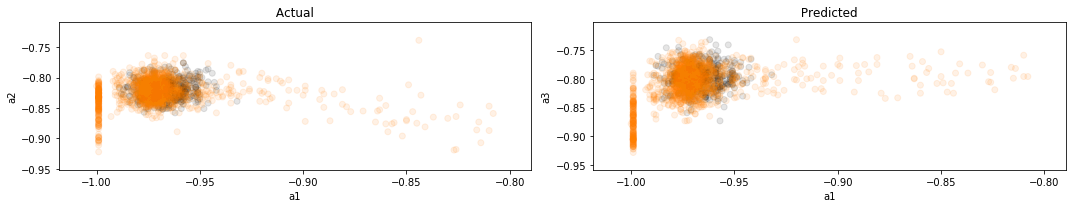

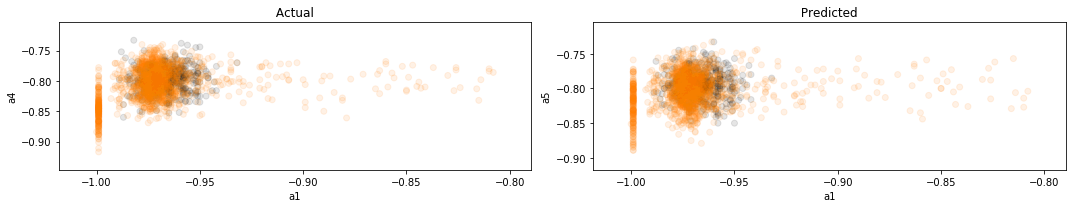

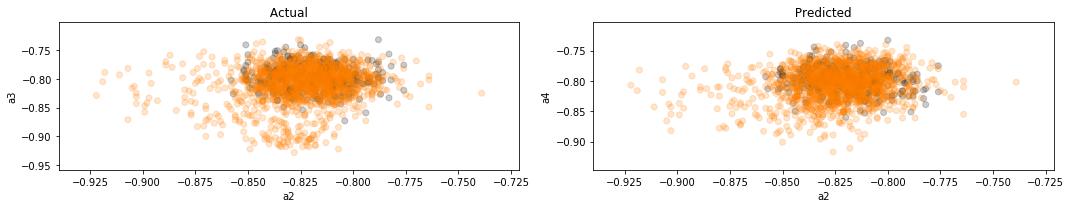

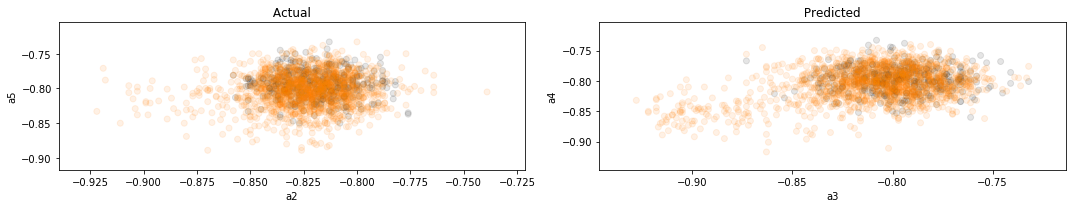

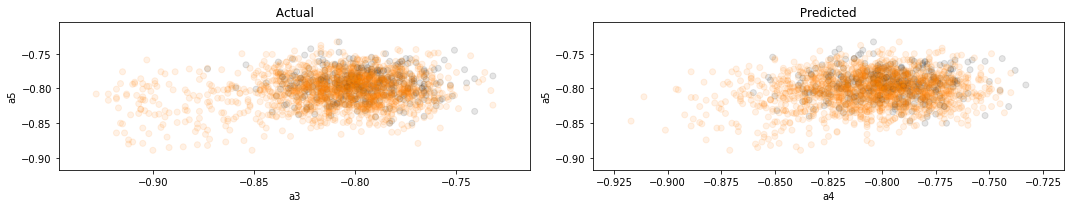

In [10]:
'''
Forehand Visualization
'''
'''
Analysis starts here !!!
'''
data = pd.read_csv('SVM_features_2BHK_20Aug.csv',index_col = 0)
print(data.head())


# Analysis !!!

false_set = data[data["Y"] == 0]
true_set = data[data["Y"] == 1]

a1 = data[['A_1']]
a2 = data[['A_2']]

a3 = data[['A_3']]
a4 = data[['A_4']]

a5 = data[['A_5']]

colors = np.array(['#000000', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a2, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a3, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a3')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a4')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a5')
fig.tight_layout()





fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a2,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a2')
axes[0].set_ylabel('a3')


#axes[0].label('Actual plot')

axes[1].scatter(a2, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a2')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a2,a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a2')
axes[0].set_ylabel('a5')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a3,a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a3')
axes[0].set_ylabel('a5')


#axes[0].label('Actual plot')

axes[1].scatter(a4, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a4')
axes[1].set_ylabel('a5')
fig.tight_layout()

                              A_1    A_2    A_3    A_4    A_5  Y
title                                                           
no_act/19A_noactivity_7(0) -0.982 -0.818 -0.758 -0.768 -0.774  0
no_act/19A_noactivity_7(1) -0.981 -0.823 -0.773 -0.806 -0.803  0
no_act/19A_noactivity_7(2) -0.984 -0.836 -0.803 -0.789 -0.774  0
no_act/19A_noactivity_7(3) -0.988 -0.816 -0.802 -0.810 -0.817  0
no_act/19A_noactivity_7(4) -0.987 -0.815 -0.814 -0.772 -0.809  0


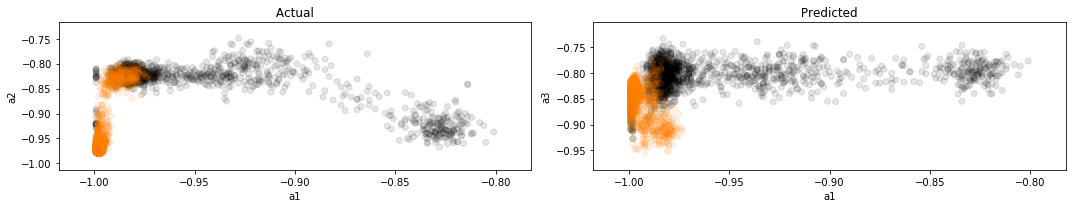

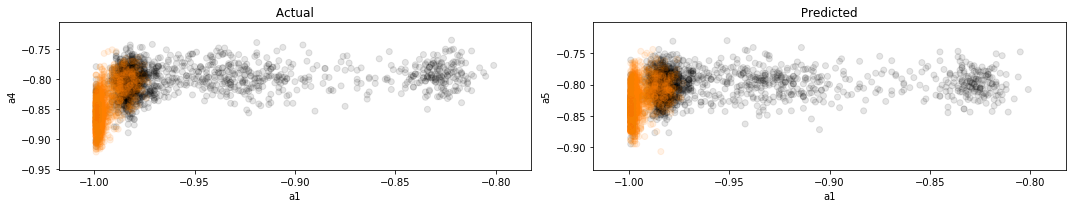

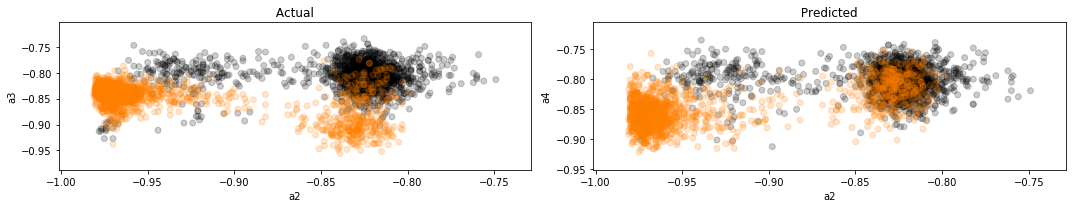

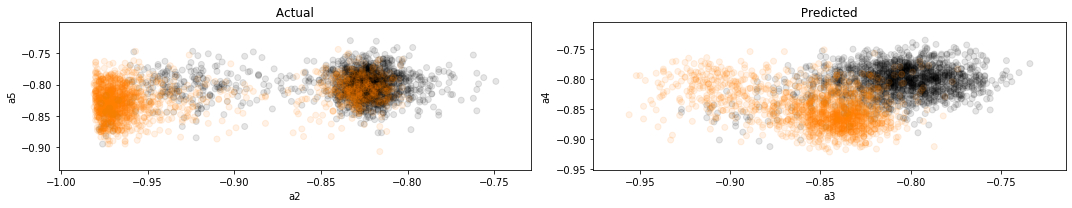

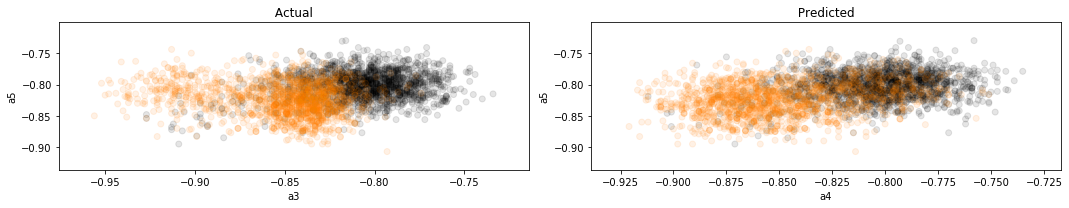

In [75]:
'''
Forehand Visualization
'''
'''
Analysis starts here !!!
'''
data = pd.read_csv('SVM_features_2BHK_ONLYHALL.csv',index_col = 0)
print(data.head())


# Analysis !!!

false_set = data[data["Y"] == 0]
true_set = data[data["Y"] == 1]

a1 = data[['A_1']]
a2 = data[['A_2']]

a3 = data[['A_3']]
a4 = data[['A_4']]

a5 = data[['A_5']]

colors = np.array(['#000000', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a2, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a3, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a3')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a4')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a5')
fig.tight_layout()





fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a2,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a2')
axes[0].set_ylabel('a3')


#axes[0].label('Actual plot')

axes[1].scatter(a2, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a2')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a2,a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a2')
axes[0].set_ylabel('a5')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a3,a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a3')
axes[0].set_ylabel('a5')


#axes[0].label('Actual plot')

axes[1].scatter(a4, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a4')
axes[1].set_ylabel('a5')
fig.tight_layout()

                              A_1    A_2    A_3    A_4    A_5  Y
title                                                           
no_act/19A_noactivity_7(0) -0.982 -0.818 -0.758 -0.768 -0.774  0
no_act/19A_noactivity_7(1) -0.981 -0.823 -0.773 -0.806 -0.803  0
no_act/19A_noactivity_7(2) -0.984 -0.836 -0.803 -0.789 -0.774  0
no_act/19A_noactivity_7(3) -0.988 -0.816 -0.802 -0.810 -0.817  0
no_act/19A_noactivity_7(4) -0.987 -0.815 -0.814 -0.772 -0.809  0


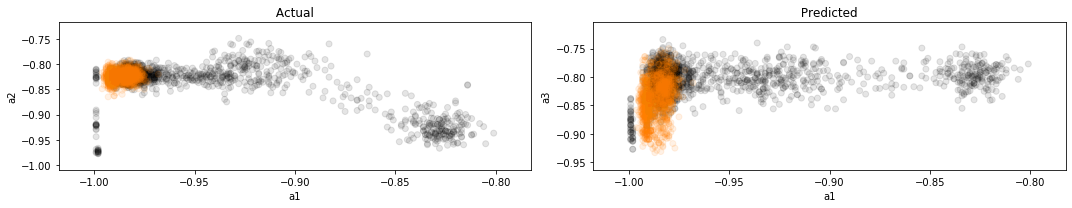

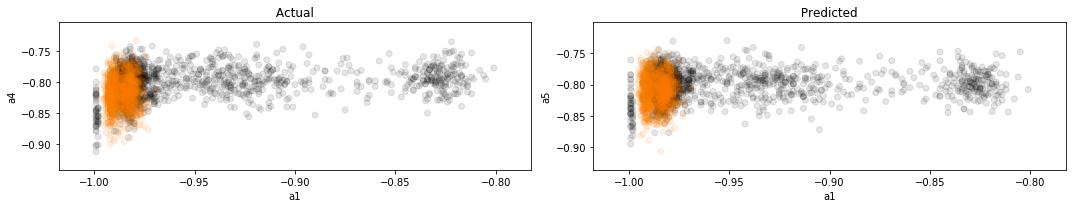

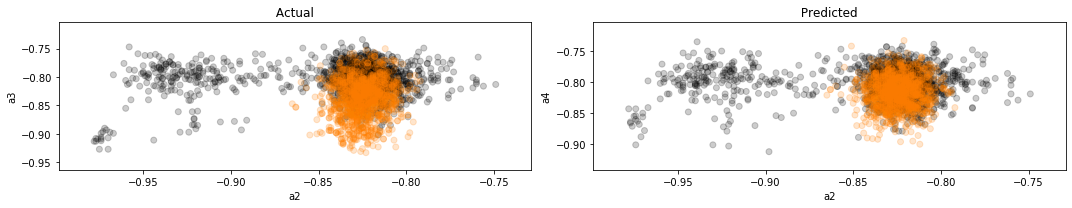

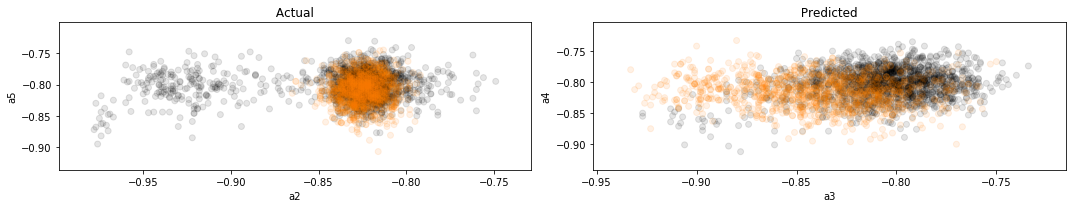

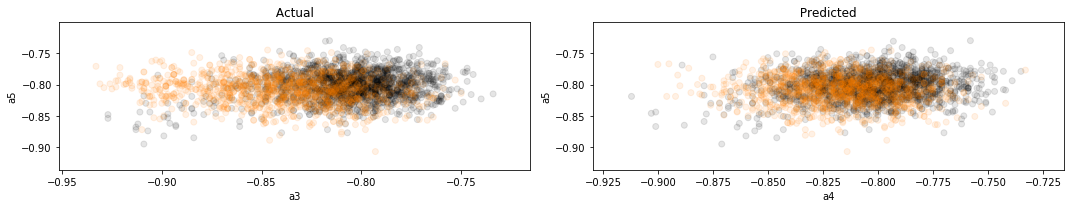

In [74]:
'''
Forehand Visualization
'''
'''
Analysis starts here !!!
'''
data = pd.read_csv('SVM_features_2BHK_ONLYBR2.csv',index_col = 0)
print(data.head())


# Analysis !!!

false_set = data[data["Y"] == 0]
true_set = data[data["Y"] == 1]

a1 = data[['A_1']]
a2 = data[['A_2']]

a3 = data[['A_3']]
a4 = data[['A_4']]

a5 = data[['A_5']]

colors = np.array(['#000000', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a2, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a3, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a3')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a4')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a5')
fig.tight_layout()





fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a2,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a2')
axes[0].set_ylabel('a3')


#axes[0].label('Actual plot')

axes[1].scatter(a2, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a2')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a2,a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a2')
axes[0].set_ylabel('a5')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a3,a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a3')
axes[0].set_ylabel('a5')


#axes[0].label('Actual plot')

axes[1].scatter(a4, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a4')
axes[1].set_ylabel('a5')
fig.tight_layout()

0 --blue-- > noactivity
1 --orange-> activity
accuracy:  0.5157728706624606
precision:  1.0
recall:  0.006472491909385114
f1:  0.012861736334405146
area under curve (auc):  0.5032362459546925
[[325   0]
 [307   2]]


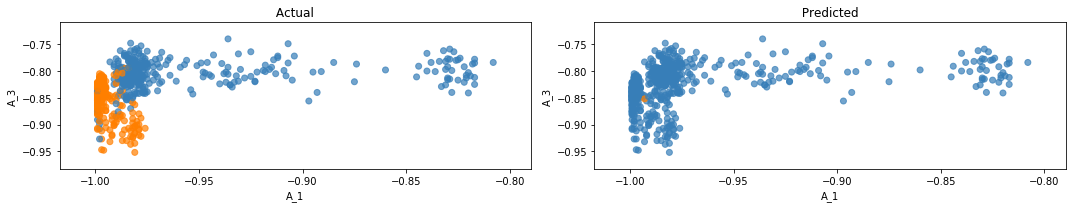

In [47]:
## Testing with one code ..


train, test = train_test_split(data, test_size=.2) 
train_normal = train[train['Y']==1] 
train_outliers = train[train['Y']==0] 
outlier_prop = len(train_outliers) / len(train_normal) 
model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=1)

feature_list = ['A_1','A_3']

#feature_list = ['A_1','A_3']
classifier = model.fit(train_normal[feature_list])
# <><><><><><><><><><><><><><><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

x1 = test[[feature_list[0]]] 
x2 = test[[feature_list[0]]] 
y1 = test[[feature_list[1]]]
y2 = test[[feature_list[1]]]


y_pred = model.predict(test[feature_list]) 

for i in range(len(y_pred)):
  if (y_pred[i] == -1):
    y_pred[i] = 0



print('0 --blue-- > noactivity')
print('1 --orange-> activity')
colors = np.array(['#377eb8', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(x1,y1, alpha=0.7, c=colors[(test['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('A_1')
axes[0].set_ylabel('A_3')


#axes[0].label('Actual plot')

axes[1].scatter(x2, y2, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('A_1')
axes[1].set_ylabel('A_3')
fig.tight_layout()

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn import metrics

targs = np.array(test[['Y']])
targs = np.reshape(targs,(targs.shape[0],))

preds = y_pred


#print('this is Actual : ',targs)
#print('this is predicted : ',preds)
print("accuracy: ", metrics.accuracy_score(targs, preds))


print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


cm = confusion_matrix(targs, preds)
print(cm)

0 --blue-- > noactivity
1 --orange-> activity
accuracy:  0.6804308797127468
precision:  0.6535433070866141
recall:  0.6484375
f1:  0.6509803921568627
area under curve (auc):  0.6780393480066444
[[213  88]
 [ 90 166]]


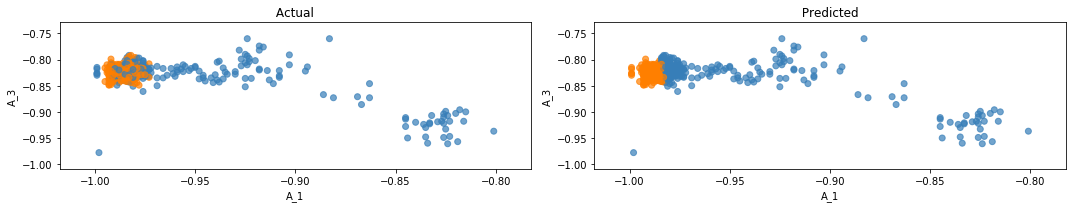

In [67]:
# svm model



########################################################
'''
This is a single prediction !!!
'''

from sklearn.svm import SVC
model = SVC(kernel='rbf')



train, test = train_test_split(data, test_size=.2) 


#train_normal = train[train['Y']==1] 
#train_outliers = train[train['Y']==0] 
#outlier_prop = len(train_outliers) / len(train_normal) 
#model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=1000)

model = SVC(kernel='rbf')

feature_list = ['A_1','A_2']

#feature_list = ['A_1','A_3']
#classifier = model.fit(train_normal[feature_list])


classifier = model.fit(train[feature_list], train['Y'])
# <><><><><><><><><><><><><><><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

x1 = test[[feature_list[0]]] 
x2 = test[[feature_list[0]]] 
y1 = test[[feature_list[1]]]
y2 = test[[feature_list[1]]]


y_pred = model.predict(test[feature_list]) 

for i in range(len(y_pred)):
  if (y_pred[i] == -1):
    y_pred[i] = 0



print('0 --blue-- > noactivity')
print('1 --orange-> activity')
colors = np.array(['#377eb8', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(x1,y1, alpha=0.7, c=colors[(test['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('A_1')
axes[0].set_ylabel('A_3')


#axes[0].label('Actual plot')

axes[1].scatter(x2, y2, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('A_1')
axes[1].set_ylabel('A_3')
fig.tight_layout()

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn import metrics

targs = np.array(test[['Y']])
targs = np.reshape(targs,(targs.shape[0],))

preds = y_pred


#print('this is Actual : ',targs)
#print('this is predicted : ',preds)
print("accuracy: ", metrics.accuracy_score(targs, preds))


print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


cm = confusion_matrix(targs, preds)
print(cm)

In [68]:
'''
The cross validation technique !!!!
'''

### k fold implementation ...
#feature_list = ['A_1','A_2','A_3','A_4','A_5']


feature_list = ['A_1','A_2']


#############################################################
## k fold validation implementation !!!

num_folds = 5

# Define per-fold score containers
pre_per_fold = []
acc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs =  np.array(data[feature_list])
targets = np.array(data["Y"])


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):
    
    trainX,trainY = inputs[train],targets[train]
    trainY = trainY.reshape(trainX.shape[0],1)
    testX,testY = inputs[test],targets[test]
    testY = testY.reshape(testX.shape[0],1)

    
    set_train = np.concatenate((trainX,trainY),axis=1)
    set_test = np.concatenate((testX,testY),axis=1)

    print('----------------------------------------------------------------------')
    
    print(f'Training for fold {fold_no} ...')
    
    

    

    model = SVC(kernel='rbf')
    classifier = model.fit(trainX,trainY)
    
    
    
    
    
    
    
    y_pred = model.predict(testX) 
    targs = np.array(testY)
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    
    for i in range(len(y_pred)):
        if (y_pred[i] == -1):
            y_pred[i] = 0   
            
    #print("accuracy: ", metrics.accuracy_score(targs, preds))
    #print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])

    
#####################################################################
#####################################################################
     # Generate a print
    #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

    pre_per_fold.append(scores[1] * 100)
    acc_per_fold.append(scores[0]*100)
    


  # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
print('------------------------------------------------------------------------')

    
    
    


----------------------------------------------------------------------
Training for fold 1 ...
----------------------------------------------------------------------
Training for fold 2 ...


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------------------------------------------------------------
Training for fold 3 ...
----------------------------------------------------------------------
Training for fold 4 ...


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Precison: 62.18181818181818 -  Accuracy : 67.50448833034112%
------------------------------------------------------------------------
> Fold 2 - Precison: 67.93893129770993 -  Accuracy : 72.71095152603232%
------------------------------------------------------------------------
> Fold 3 - Precison: 60.88709677419355 -  Accuracy : 68.2226211849192%
------------------------------------------------------------------------
> Fold 4 - Precison: 66.02316602316603 -  Accuracy : 71.63375224416517%
------------------------------------------------------------------------
> Fold 5 - Precison: 57.99256505576208 -  Accuracy : 65.64748201438849%
------------------------------------------------------------------------
Average scores for a

/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                              BA_1   BA_2   CB_1   CB_2    AC_1   AC_2  Y
title                                                                    
no_act/19A_noactivity_7(0)  10.654  9.920  2.211  2.061  10.211  9.284  0
no_act/19A_noactivity_7(1)  10.491  9.679  2.146  2.108   9.996  9.023  0
no_act/19A_noactivity_7(2)  11.017  9.082  2.281  2.089  10.488  8.545  0
no_act/19A_noactivity_7(3)  10.353  9.709  2.427  2.146  10.065  9.007  0
no_act/19A_noactivity_7(4)  10.704  9.598  2.361  2.217  10.143  9.033  0


"\n\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))\n\naxes[0].scatter(a1,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) \naxes[0].title.set_text(' Actual ')\naxes[0].set_xlabel('a1')\naxes[0].set_ylabel('a3')\n\n\n#axes[0].label('Actual plot')\n\naxes[1].scatter(a1, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) \naxes[1].title.set_text(' Predicted ')\naxes[1].set_xlabel('a1')\naxes[1].set_ylabel('a4')\nfig.tight_layout()\n\n"

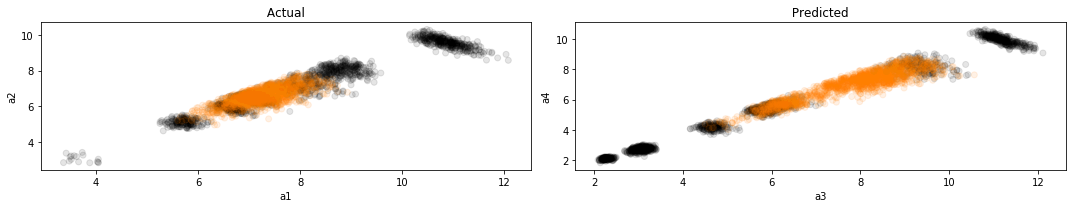

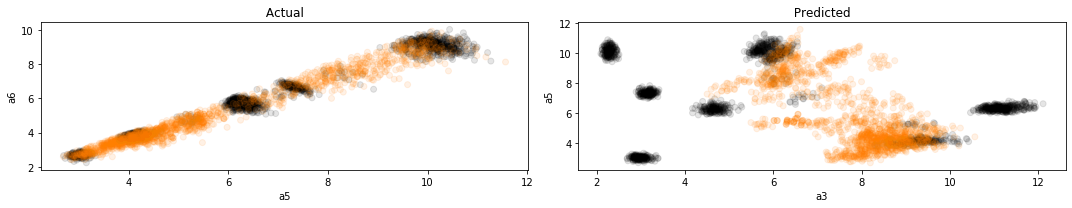

In [15]:
################################################
## analysis with phase ..

#######################################################################

## ANALYSIS FOR PHASE !!!

data = pd.read_csv('Phase_feat_dataset_1.csv',index_col = 0)

print(data.head())

colors = np.array(['#000000', '#ff7f00']) 



false_set = data[data["Y"] == 0]
true_set = data[data["Y"] == 1]

a1 = data[['BA_1']]
a2 = data[['BA_2']]

a3 = data[['CB_1']]
a4 = data[['CB_2']]

a5 = data[['AC_1']]
a6 = data[['AC_2']]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a2, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a5,a6, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a5')
axes[0].set_ylabel('a6')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a5')
fig.tight_layout()


'''

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a3')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a4')
fig.tight_layout()

'''



0 --blue-- > noactivity
1 --orange-> activity
accuracy:  0.9069400630914827
precision:  0.8851963746223565
recall:  0.9331210191082803
f1:  0.9085271317829456
area under curve (auc):  0.9071855095541401
[[282  38]
 [ 21 293]]


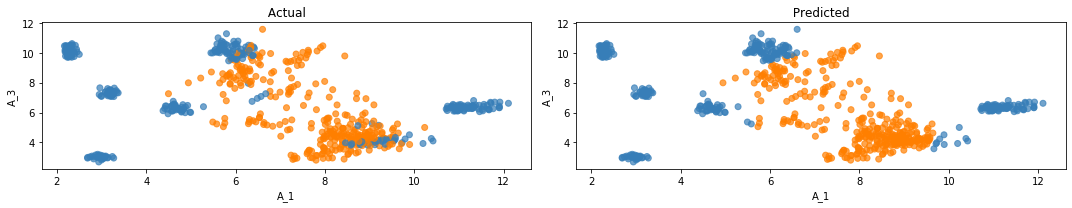

In [18]:

########################################################
'''
This is a single prediction !!!
'''


model = SVC(kernel='rbf')



train, test = train_test_split(data, test_size=.2) 


#train_normal = train[train['Y']==1] 
#train_outliers = train[train['Y']==0] 
#outlier_prop = len(train_outliers) / len(train_normal) 
#model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=1000)

model = SVC(kernel='rbf')

feature_list = ['CB_1','AC_1']

#feature_list = ['A_1','A_3']
#classifier = model.fit(train_normal[feature_list])


classifier = model.fit(train[feature_list], train['Y'])
# <><><><><><><><><><><><><><><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

x1 = test[[feature_list[0]]] 
x2 = test[[feature_list[0]]] 
y1 = test[[feature_list[1]]]
y2 = test[[feature_list[1]]]


y_pred = model.predict(test[feature_list]) 

for i in range(len(y_pred)):
  if (y_pred[i] == -1):
    y_pred[i] = 0



print('0 --blue-- > noactivity')
print('1 --orange-> activity')
colors = np.array(['#377eb8', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(x1,y1, alpha=0.7, c=colors[(test['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('A_1')
axes[0].set_ylabel('A_3')


#axes[0].label('Actual plot')

axes[1].scatter(x2, y2, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('A_1')
axes[1].set_ylabel('A_3')
fig.tight_layout()

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn import metrics

targs = np.array(test[['Y']])
targs = np.reshape(targs,(targs.shape[0],))

preds = y_pred


#print('this is Actual : ',targs)
#print('this is predicted : ',preds)
print("accuracy: ", metrics.accuracy_score(targs, preds))


print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


cm = confusion_matrix(targs, preds)
print(cm)

In [20]:
'''
The cross validation technique !!!!
'''

### k fold implementation ...
#feature_list = ['A_1','A_2','A_3','A_4','A_5']


feature_list = ['CB_1','CB_2']


#############################################################
## k fold validation implementation !!!

num_folds = 10

# Define per-fold score containers
pre_per_fold = []
acc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs =  np.array(data[feature_list])
targets = np.array(data["Y"])


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):
    
    trainX,trainY = inputs[train],targets[train]
    trainY = trainY.reshape(trainX.shape[0],1)
    testX,testY = inputs[test],targets[test]
    testY = testY.reshape(testX.shape[0],1)

    
    set_train = np.concatenate((trainX,trainY),axis=1)
    set_test = np.concatenate((testX,testY),axis=1)

    print('----------------------------------------------------------------------')
    
    print(f'Training for fold {fold_no} ...')
    
    

    

    model = SVC(kernel='rbf')
    classifier = model.fit(trainX,trainY)
    
    
    
    
    
    
    
    y_pred = model.predict(testX) 
    targs = np.array(testY)
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    
    for i in range(len(y_pred)):
        if (y_pred[i] == -1):
            y_pred[i] = 0   
            
    #print("accuracy: ", metrics.accuracy_score(targs, preds))
    #print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])

    
#####################################################################
#####################################################################
     # Generate a print
    #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

    pre_per_fold.append(scores[1] * 100)
    acc_per_fold.append(scores[0]*100)
    


  # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
print('------------------------------------------------------------------------')

    
    
    


----------------------------------------------------------------------
Training for fold 1 ...
----------------------------------------------------------------------
Training for fold 2 ...
----------------------------------------------------------------------
Training for fold 3 ...


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------------------------------------------------------------
Training for fold 4 ...
----------------------------------------------------------------------
Training for fold 5 ...
----------------------------------------------------------------------
Training for fold 6 ...


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------------------------------------------------------------
Training for fold 7 ...
----------------------------------------------------------------------
Training for fold 8 ...
----------------------------------------------------------------------
Training for fold 9 ...


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------------------------------------------------------------
Training for fold 10 ...
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Precison: 85.79881656804734 -  Accuracy : 86.75078864353313%
------------------------------------------------------------------------
> Fold 2 - Precison: 84.97109826589595 -  Accuracy : 87.38170347003155%
------------------------------------------------------------------------
> Fold 3 - Precison: 83.03030303030303 -  Accuracy : 85.17350157728707%
------------------------------------------------------------------------
> Fold 4 - Precison: 85.90604026845638 -  Accuracy : 84.22712933753942%
------------------------------------------------------------------------
> Fold 5 - Precison: 80.11695906432749 -  Accuracy : 84.22712933753942%
------------------------------------------------------------------------
> Fold 6 - Preciso

/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
### USING BOTH MAGNITUDES AND PHASE !!!

data1 = pd.read_csv('SVM_features_2BHK_ONLYHALL.csv')

data101 = pd.DataFrame(data1,columns = ['title','A_1','A_2','A_3','A_4','A_5'])
print(data101.head())

data2 = pd.read_csv('Phase_ONLYHALL_1.csv')
data102 = pd.DataFrame(data2,columns  = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2','Y'])
print(data102.head())


data3 = pd.concat([data101,data102],axis = 1)
print(data3.head())
data3.to_csv("2_BHK_HALL_dataset.csv")

                        title    A_1    A_2    A_3    A_4    A_5
0  no_act/19A_noactivity_7(0) -0.982 -0.818 -0.758 -0.768 -0.774
1  no_act/19A_noactivity_7(1) -0.981 -0.823 -0.773 -0.806 -0.803
2  no_act/19A_noactivity_7(2) -0.984 -0.836 -0.803 -0.789 -0.774
3  no_act/19A_noactivity_7(3) -0.988 -0.816 -0.802 -0.810 -0.817
4  no_act/19A_noactivity_7(4) -0.987 -0.815 -0.814 -0.772 -0.809
     BA_1   BA_2   CB_1   CB_2    AC_1   AC_2  Y
0  10.654  9.920  2.211  2.061  10.211  9.284  0
1  10.491  9.679  2.146  2.108   9.996  9.023  0
2  11.017  9.082  2.281  2.089  10.488  8.545  0
3  10.353  9.709  2.427  2.146  10.065  9.007  0
4  10.704  9.598  2.361  2.217  10.143  9.033  0
                        title    A_1    A_2    A_3    A_4    A_5    BA_1  \
0  no_act/19A_noactivity_7(0) -0.982 -0.818 -0.758 -0.768 -0.774  10.654   
1  no_act/19A_noactivity_7(1) -0.981 -0.823 -0.773 -0.806 -0.803  10.491   
2  no_act/19A_noactivity_7(2) -0.984 -0.836 -0.803 -0.789 -0.774  11.017   
3  no_act/19

In [3]:
### ANALYSING ALL :
data = pd.read_csv('2_BHK_20Aug_dataset.csv',index_col = 0)

print(data.head())

colors = np.array(['#000000', '#ff7f00']) 




'''
The cross validation technique !!!!
'''

### k fold implementation ...
#feature_list = ['A_2','A_3','A_4','A_5','BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']
#feature_list = ['BA_2','CB_2','AC_2']
#feature_list = ['A_2','A_3','A_4','A_5']


feature_list = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']


#############################################################
## k fold validation implementation !!!

num_folds = 5

# Define per-fold score containers
pre_per_fold = []
acc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs =  np.array(data[feature_list])
targets = np.array(data["Y"])


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):
    
    trainX,trainY = inputs[train],targets[train]
    trainY = trainY.reshape(trainX.shape[0],1)
    testX,testY = inputs[test],targets[test]
    testY = testY.reshape(testX.shape[0],1)

    
    set_train = np.concatenate((trainX,trainY),axis=1)
    set_test = np.concatenate((testX,testY),axis=1)
    '''
    print('----------------------------------------------------------------------')
    
    print(f'Training for fold {fold_no} ...')
    '''
    model = SVC(kernel='rbf')
    classifier = model.fit(trainX,trainY)
    
    
    
    
    
    
    
    y_pred = model.predict(testX) 
    targs = np.array(testY)
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    
    for i in range(len(y_pred)):
        if (y_pred[i] == -1):
            y_pred[i] = 0   
            
    #print("accuracy: ", metrics.accuracy_score(targs, preds))
    #print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])

    
#####################################################################
#####################################################################
     # Generate a print
    #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

    pre_per_fold.append(scores[1] * 100)
    acc_per_fold.append(scores[0]*100)
    


  # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
'''
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
'''

print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
print('------------------------------------------------------------------------')

    
    
    


                        title    A_1    A_2    A_3    A_4    A_5    BA_1  \
0  no_act/19A_noactivity_7(0) -0.982 -0.818 -0.758 -0.768 -0.774  10.654   
1  no_act/19A_noactivity_7(1) -0.981 -0.823 -0.773 -0.806 -0.803  10.491   
2  no_act/19A_noactivity_7(2) -0.984 -0.836 -0.803 -0.789 -0.774  11.017   
3  no_act/19A_noactivity_7(3) -0.988 -0.816 -0.802 -0.810 -0.817  10.353   
4  no_act/19A_noactivity_7(4) -0.987 -0.815 -0.814 -0.772 -0.809  10.704   

    BA_2   CB_1   CB_2    AC_1   AC_2  Y  
0  9.920  2.211  2.061  10.211  9.284  0  
1  9.679  2.146  2.108   9.996  9.023  0  
2  9.082  2.281  2.089  10.488  8.545  0  
3  9.709  2.427  2.146  10.065  9.007  0  
4  9.598  2.361  2.217  10.143  9.033  0  


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

------------------------------------------------------------------------
Score per fold
Average scores for all folds:
> Accuracy: 94.12840561942778 (+- 1.189617391851903)
> Precision: 99.49953357017458(+- 0.49069334842738704
------------------------------------------------------------------------
